# Fashion Recommendation System using Image Features

In [1]:
from zipfile import ZipFile
import os


In [12]:
zip_file_path = r'C:\Users\ADMIN\Documents\women-fashion.zip'
extraction_directory = r'C:\Users\ADMIN\Documents\woman fashion'


if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

['anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg', 'Anarkali suit with a modern twist.jpg', 'Anarkali suit with fitted bodice with a high neckline.jpg', 'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', 'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', 'anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg', 'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg', 'beige top adorned with black dots and a green skirt.jpg', 'black and white gingham checkered A-line dress with a flared skirt.jpg', 'black double-breasted blazer with gold buttons, paired with a mid-length skirt.jpg']


In [13]:
# correcting the path to include the 'women fashion' directory and listing its contents
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

# list the files in the updated directory
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['.DS_Store',
  'anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg',
  'Anarkali suit with a modern twist.jpg',
  'Anarkali suit with fitted bodice with a high neckline.jpg',
  'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg',
  'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg',
  'anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg',
  'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg',
  'beige top adorned with black dots and a green skirt.jpg',
  'black and white gingham checkered A-line dress with a flared skirt.jpg'],
 97)

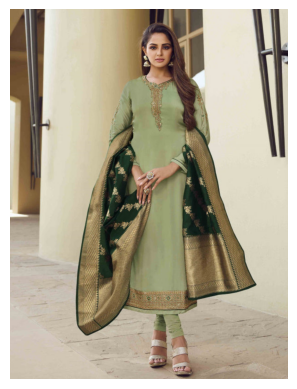

In [16]:
from PIL import Image
import os

def display_image(file_path):
    try:
        image = Image.open(file_path)
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error opening image: {e}")

# Assuming extracted_files_updated is a list of file names
# Filter out non-image files
image_files = [file for file in extracted_files_updated if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]

# display the first image to understand its characteristics
if image_files:
    first_image_path = os.path.join(extraction_directory_updated, image_files[0])
    display_image(first_image_path)
else:
    print("No image files found.")


In [17]:
import glob

# directory path containing your images
image_directory = '/content/women_fashion/women fashion'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# print the list of image file paths
print(image_paths_list)

[]


In [10]:
import os
import numpy as np
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

# Define the base VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

# Define the directory containing the images
image_directory = r'C:\Users\ADMIN\Documents\woman fashion'

# Populate image_paths_list with image paths from the directory
image_paths_list = [os.path.join(image_directory, img) for img in os.listdir(image_directory) if img.endswith(('.jpg', '.jpeg', '.png'))]

# Function to preprocess an image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

# Function to extract features from an image using the model
def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

# Initialize lists to store features and image names
all_features = []
all_image_names = []

# Process each image in image_paths_list
for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

# Now all_features contains the extracted features for each image
# and all_image_names contains the corresponding image names


1/1 [==============================] - 0s 430ms/step


In [22]:
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
from PIL import Image



In [23]:
def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/content/women_fashion/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 260ms/step


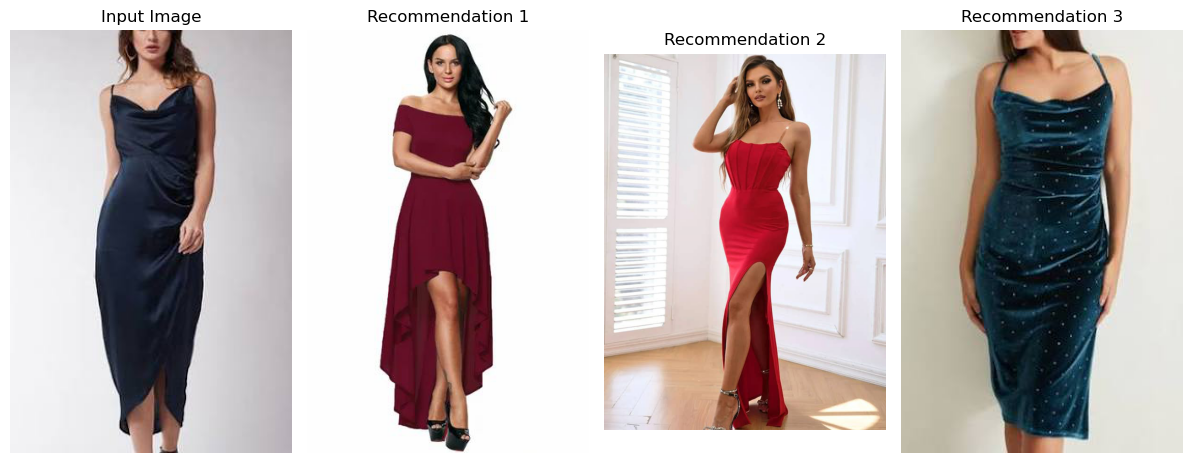

In [29]:
input_image_path = r'C:\Users\ADMIN\Documents\woman fashion\dark, elegant, sleeveless dress that reaches down to about mid-calf.jpg'

recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)
